In [2]:
import os
os.getcwd()
os.chdir('C:\\Users\\Sezin\\Documents\\FoodAI\\feature_selection\\30_12_12_leave_group_o\\Figures')

'C:\\Users\\Sezin\\Documents\\FoodAI\\feature_selection\\30_12_12_leave_group_o\\Figures'

In [3]:
Subsets_Chew=[['target_moisture', 'fat', 'carbs', 'moisture'] ]#,['target_moisture', 'fat', 'carbs', 'moisture','protein', 'ash'],['target_moisture', 'fat', 'carbs', 'moisture','protein', 'ash','fiber']    ]  

In [4]:
Subsets_Hard=[['target_moisture', 'fat', 'carbs', 'moisture'] ,[ 'fat', 'carbs', 'moisture']    ]  

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeavePGroupsOut

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import itertools
from sklearn.metrics import mean_absolute_percentage_error
import pylab as py
import matplotlib.pyplot as plt
    
from matplotlib.colors import ListedColormap
    
data =pd.read_csv('./../30_12_12.csv',header=0)
features_all=data.iloc[:,1:8]
columns = list(features_all.columns)

for sub_i in range(len(Subsets_Chew)):

    response = 'chewiness'
    if response=='crosswise':
        X = np.array(features_all)
       # y = np.array(features_all.iloc[:,6:7])
       # print(features_all.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
       # print(features_all.iloc[:,6:7].head())

    elif response=='lengthwise':
        X = np.array(features_all)
       # y = np.array(features_all.iloc[:,7:8])    
       # print(features_all.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
       # print(features_all.iloc[:,7:8].head())    

    elif response=='chewiness':
        y = np.array(data.iloc[:,9:10])
        print(features_all.head())
        print(data.iloc[:,9:10].head())
    elif response=='hardness':
        y = np.array(data.iloc[:,8:9])
        print(features_all.head())
        print(data.iloc[:,8:9].head())        

    feat=[columns.index(i) for i in Subsets_Chew[sub_i]]
    X = np.array(features_all.iloc[:,feat])


    y_true, predictions, residuals = list(), list(), list()
    loo = LeavePGroupsOut(n_groups=1)
    groups = data.iloc[:,10:11].values.ravel()
    study_id = data.iloc[:,0]

    print(groups)
    k_fold=loo.get_n_splits(X,groups=groups)
    print(k_fold)
    grid = dict()
    grid['sel__k'] = [i for i in range(1, X.shape[1]+1)]




    g_mse, g_mae, g_rmse, g_r2, g_r2adj,g_mape = list(),list(),list(),list(),list(),list()
    count=0
    predictions_, y_trues_, residuals_, standardized_residuals_ = list(), list(), list(), list()
    test_indices=[]
    labels= list()
    for train_index, test_index in loo.split(X,groups=groups):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        count += 1
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        labels.extend(study_id[test_index])

       # scaler = StandardScaler()
       # y_train = scaler.fit_transform(y_train)
       # y_test = scaler.transform(y_test)

        reg = Ridge().fit(X_train, y_train.ravel())
        prediction = reg.predict(X_test)
        predictions_.extend(prediction)
        y_trues_.extend(y_test.ravel())

        residual =  y_test.ravel()-prediction
        residuals_.extend(residual)          
        standardized_residuals_.extend(residual/np.sqrt(y_test.ravel()))           #https://www.statisticshowto.com/what-is-a-standardized-residuals/#:~:text=The%20standardized%20residual%20is%20a,to%20the%20chi%2Dsquare%20value.


        test_indices.extend(test_index)
        pred = predictions_
        true = y_trues_

    g_mse.append(mean_squared_error(true, pred))
    g_mae.append(mean_absolute_error(true, pred))
    g_rmse.append(mean_squared_error(true, pred, squared=False))
    g_mape.append(mean_absolute_percentage_error(true, pred))
    g_r2.append(r2_score(true, pred))
    g_r2adj.append(1 - (1-r2_score(true, pred))*(len(true)-1)/(len(true)-len(feat)-1))
    error =np.array(g_mse).mean()
    error2 =np.array(g_mae).mean()
    error3 =np.array(g_rmse).mean()
    error4 = np.array(g_mape).mean()
    r2_score_val =np.array(g_r2).mean()
    r2_adj =np.array(g_r2adj).mean()

    print(feat)
    #Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 
    #A constant model that always predicts the expected value of y, disregarding the input features, would get a  score of 0.0.
    print('Number of features:',  len(feat))
    print('Features:',  features_all.columns[feat])
    #  print('Mean Squared Error (MSE): %.3f' % error) 
    #  print('Mean Absolute Error (MAE): %.3f' % error2) 
    print('Root Mean Squared Error (RMSE): %.3f' % error3) 
    print('Adjusted r2_score: %.3f' %r2_adj)
    print('r2_score: %.3f' % r2_score_val)
    print('Variance Inflation Factor (VIF): %.3f' %(1/(1-r2_adj))) # Usually a variable with VIF greater than 10 is considered to be troublesome.

    print(f'Mean absolute percentage error (MAPE): {error4:.1f}%')

    error3 = mean_squared_error(true, pred, squared=False)
    error4 =  np.mean(np.abs((np.array(true) - np.array(pred))/true))*100
#mean_absolute_percentage_error(true, pred)
    r2_score_val = r2_score(true, pred)
    adj_R2=(1 - (1-r2_score_val)*(len(true)-1)/(len(true)-((7))-1))    

    fig = plt.figure(figsize=(3,3), dpi=300)
    ax = plt.axes()

   # fig, ax = plt.subplots(figsize=(4,4))
    plt.text(x=0.05,y=0.83,s='RMSE: %.3f' % error3, transform=ax.transAxes)
    plt.text(x=0.05,y=0.90,s=f'MAPE: {error4:.1f}%', transform=ax.transAxes)
    #plt.text(x=0.05,y=0.95,s='Adjusted R2: %.3f' % adj_R2, transform=ax.transAxes)
    #plt.text(x=0.05,y=0.90,s='R2: %.3f' % r2_score_val, transform=ax.transAxes)


    #plt.title('Ridge (Subset'+str(sub_i+1)+')('+response+')')
    #ax.scatter(true, pred,labels)
    colors = ListedColormap(['#F8766D','#00BA38','#619CFF'])

    scatter=plt.scatter(true, pred,c=labels, cmap=colors,s=20)

    true=np.array(true)


    ax.plot([true.min(), true.max()], [true.min(), true.max()], linestyle = 'dotted', lw=3, color='gray')
    ax.legend(*scatter.legend_elements(),title="Study_ID", loc='center left', bbox_to_anchor=(1, 0.5))

    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
  #  plt.savefig('ridge_chew_pred.pdf', bbox_inches='tight')

    plt.show()





FileNotFoundError: [Errno 2] No such file or directory: './../30_12_12.csv'

In [33]:
data.head()

,Study_ID,target_moisture,fat,protein,carbs,ash,moisture,fiber,Hardness,Chewiness,Group_ID,Unnamed: 11
0,2,56.85,6.662,62.6988,20.491,4.2445,5.3937,0.51,46.7090,38.049816,5,jie_extrusion_wg0
1,2,56.85,6.662,62.6988,20.491,4.2445,5.3937,0.51,40.4365,31.294988,5,jie_extrusion_wg0
2,2,57.16,6.662,62.6988,20.491,4.2445,5.3937,0.51,49.0595,39.494747,5,jie_extrusion_wg0
3,2,57.51,6.582,63.1788,19.861,3.9545,5.9137,0.51,38.6525,26.862429,6,jie_extrusion_wg10
4,2,57.24,6.582,63.1788,19.861,3.9545,5.9137,0.51,50.8115,38.977081,6,jie_extrusion_wg10


In [51]:
features_all.head()

,target_moisture,fat,protein,carbs,ash,moisture,fiber
0,56.85,6.662,62.6988,20.491,4.2445,5.3937,0.51
1,56.85,6.662,62.6988,20.491,4.2445,5.3937,0.51
2,57.16,6.662,62.6988,20.491,4.2445,5.3937,0.51
3,57.51,6.582,63.1788,19.861,3.9545,5.9137,0.51
4,57.24,6.582,63.1788,19.861,3.9545,5.9137,0.51


In [71]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def sklearn_vif(exogs, data):

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # form input data for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        X, y = data[not_exog], data[exog]
        #print(data[not_exog])
        # extract r-squared from the fit
        r_squared = LinearRegression().fit(X, y).score(X, y)
        print(exog," r_squared: ",r_squared)
        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif

exogs=list(features_all)
exogs=['fat','carbs', 'target_moisture','moisture']
sklearn_vif(exogs, features_all)

fat  r_squared:  0.8576620356131411
carbs  r_squared:  0.7490141907576697
target_moisture  r_squared:  0.8213767555749595
moisture  r_squared:  0.37229987395244735


,VIF,Tolerance
fat,7.025533,0.142338
carbs,3.984289,0.250986
target_moisture,5.598376,0.178623
moisture,1.593117,0.627700


In [75]:
features_all.loc[:,['fat','carbs', 'target_moisture','moisture']].corr()

,fat,carbs,target_moisture,moisture
fat,1.000000,0.769236,-0.903252,-0.041350
carbs,0.769236,1.000000,-0.741766,0.356962
target_moisture,-0.903252,-0.741766,1.000000,0.001045
moisture,-0.041350,0.356962,0.001045,1.000000


In [58]:

reg = LinearRegression().fit(X, y)
vif = 1 / (1 - reg.score(X, y))
vif

11.372326609519567

In [55]:
import pandas as pd
import numpy as np

a = [1, 1, 2, 3, 4]
b = [2, 2, 3, 2, 1]
c = [4, 6, 7, 8, 9]
d = [4, 3, 4, 5, 4]

df_cor = features_all.corr()
pd.DataFrame(np.linalg.inv(features_all.corr().values), index = df_cor.index, columns=df_cor.columns)

,target_moisture,fat,protein,carbs,ash,moisture,fiber
target_moisture,10.310969,-31.862556,-135.398227,-74.039763,-20.281556,-31.218041,-40.124087
fat,-31.862556,733.796351,2406.951119,1297.770339,234.130450,476.343795,910.365245
protein,-135.398227,2406.951119,8056.548855,4364.279055,829.288591,1613.942137,2982.087877
carbs,-74.039763,1297.770339,4364.279055,2370.823414,457.387455,875.481303,1605.591468
ash,-20.281556,234.130450,829.288591,457.387455,112.658664,177.556467,271.226558
moisture,-31.218041,476.343795,1613.942137,875.481303,177.556467,331.623698,580.042631
fiber,-40.124087,910.365245,2982.087877,1605.591468,271.226558,580.042631,1153.533359


In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(df):
    scaler = StandardScaler()
    df = scaler.fit_transform(df)
    
    X = pd.DataFrame(df)
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif
compute_vif(features_all)

C:\Users\Sezin\anaconda3\envs\lab39\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Variable,VIF
0,0,10.310969
1,1,733.796351
2,2,8056.548855
3,3,2370.823414
4,4,112.658664
5,5,331.623698
6,6,1153.533359
7,7,NaN


In [56]:
cc = np.corrcoef(features_all, rowvar=False)
VIF = np.linalg.inv(cc)
VIF.diagonal()

array([  10.31096943,  733.79635073, 8056.54885488, 2370.82341366,
        112.65866409,  331.62369774, 1153.53335907])

In [50]:
vif

,VIF Factor,features
0,719.552371,target_moisture
1,38.767492,fat
2,539.829530,protein
3,38.088599,carbs
4,728.716431,ash
5,74.040585,moisture
6,87.582376,fiber


In [18]:
os.getcwd()

'C:\\Users\\Sezin\\Documents\\FoodAI\\feature_selection\\30_12_12_leave_group_o\\Figures'

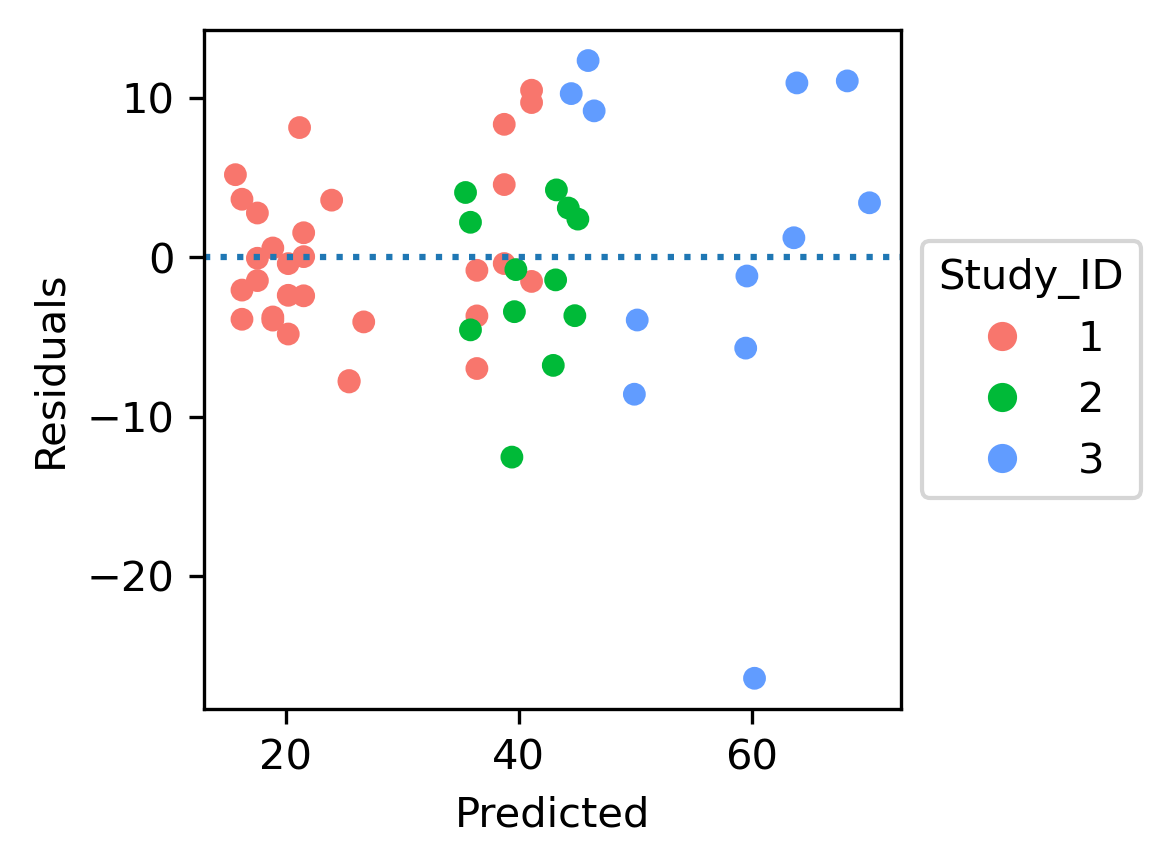

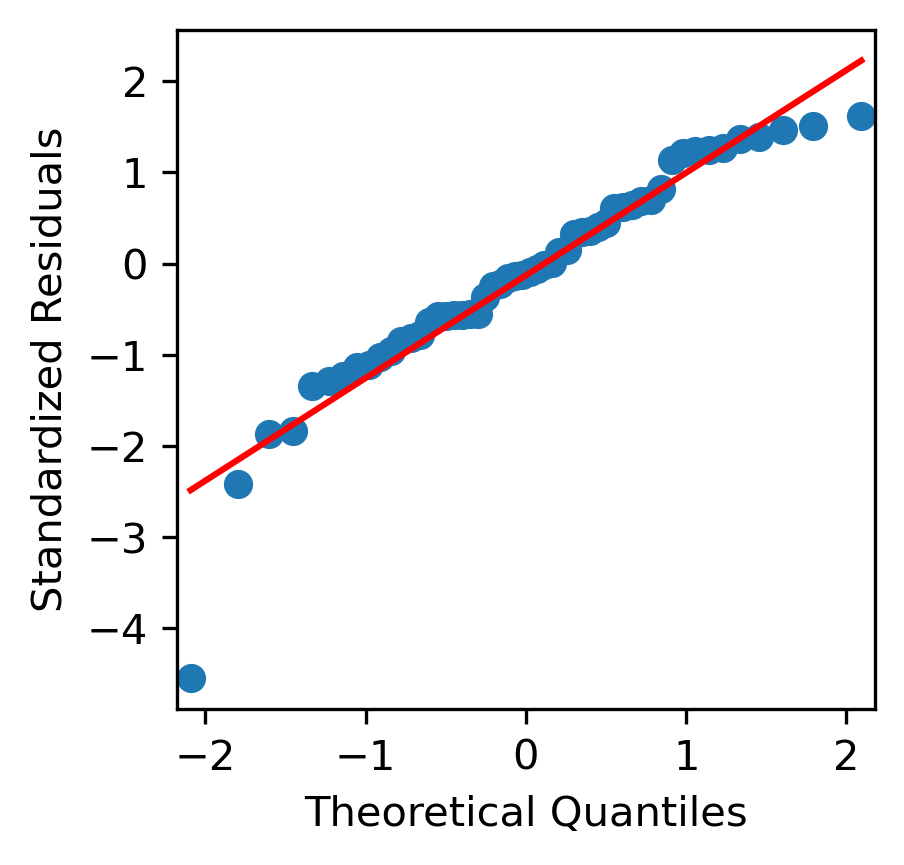

In [64]:
    import statsmodels.api as sm
    fig = plt.figure(figsize=(3,3), dpi=300)
    ax = plt.axes()

    colors = ListedColormap(['#F8766D','#00BA38','#619CFF'])
    plt.scatter(y=residuals_,x=predictions_ ,c=labels, cmap=colors,s=20)
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    # plt.scatter(y=residual,x=count, color = 'blue')
    # plt.xlabel('sample')
    # plt.ylabel('residuals')
    ax.legend(*scatter.legend_elements(),title="Study_ID", loc='center left', bbox_to_anchor=(1, 0.5))

    plt.axhline(y=0,  linestyle = 'dotted')
    plt.savefig('Result/ridge_linearity_homo.pdf', bbox_inches='tight')

    plt.show()
    fig = plt.figure(figsize=(3,3), dpi=300)
    ax = plt.axes()

    sm.qqplot(np.array(standardized_residuals_), line ='s', ax=ax)  #https://www.statisticshowto.com/what-is-a-standardized-residuals/#:~:text=The%20standardized%20residual%20is%20a,to%20the%20chi%2Dsquare%20value.
    plt.ylabel('Standardized Residuals')
    plt.savefig('Result/ridge_normality.pdf', bbox_inches='tight')


    plt.show()

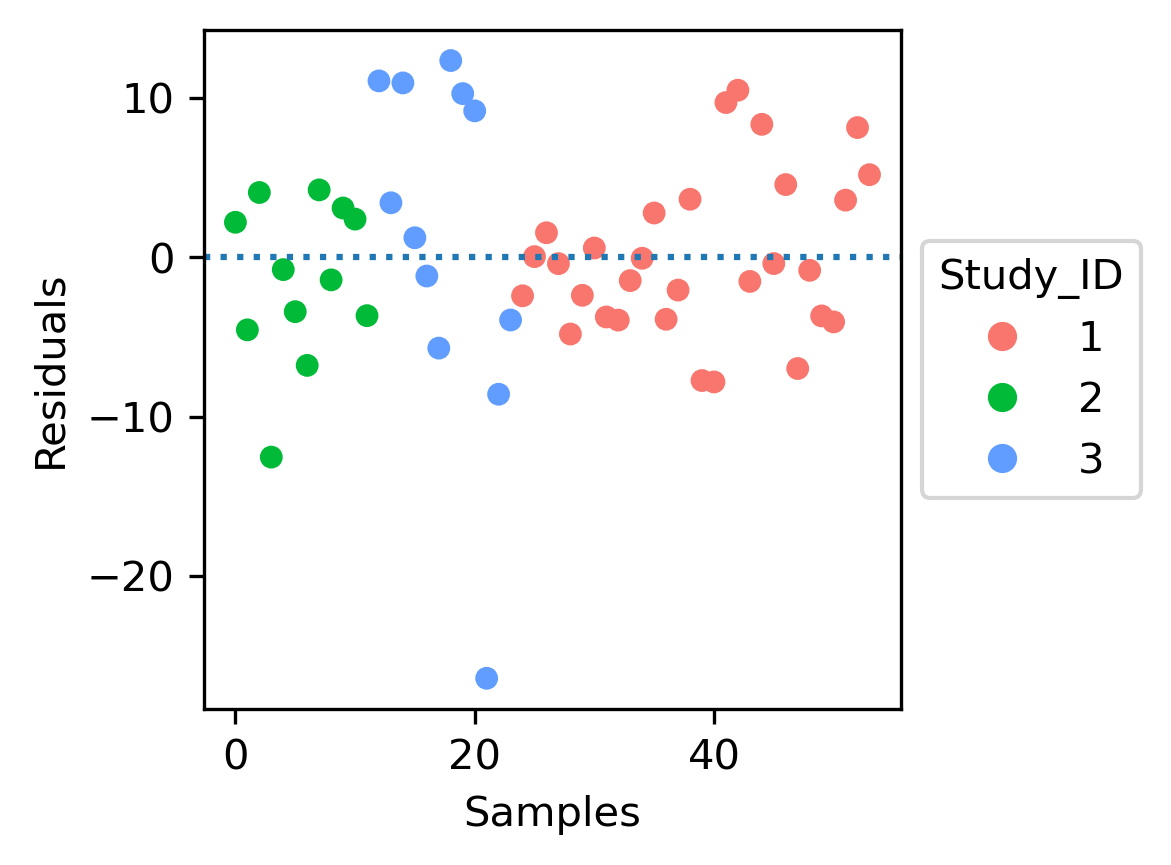

In [46]:

fig = plt.figure(figsize=(3,3), dpi=300)
ax = plt.axes()

colors = ListedColormap(['#F8766D','#00BA38','#619CFF'])
plt.axhline(y=0,  linestyle = 'dotted')

plt.scatter(y=residuals_,x=test_indices ,c=labels, cmap=colors,s=20)
plt.xlabel('Samples')
plt.ylabel('Residuals')
# plt.scatter(y=residual,x=count, color = 'blue')
# plt.xlabel('sample')
# plt.ylabel('residuals')
ax.legend(*scatter.legend_elements(),title="Study_ID", loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Result/ridge_autocorrelation.pdf', bbox_inches='tight')


   target_moisture    fat  protein   carbs     ash  moisture  fiber
0            56.85  6.662  62.6988  20.491  4.2445    5.3937   0.51
1            56.85  6.662  62.6988  20.491  4.2445    5.3937   0.51
2            57.16  6.662  62.6988  20.491  4.2445    5.3937   0.51
3            57.51  6.582  63.1788  19.861  3.9545    5.9137   0.51
4            57.24  6.582  63.1788  19.861  3.9545    5.9137   0.51
   Hardness
0   46.7090
1   40.4365
2   49.0595
3   38.6525
4   50.8115
[ 5  5  5  6  6  6  7  7  7  8  8  8  9  9  9 10 10 10 11 11 11 12 12 12
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  3  3  3  3  3  3  3
  3  3  4  4  4  4]
12
[0, 1, 3, 5]
Number of features: 4
Features: Index(['target_moisture', 'fat', 'carbs', 'moisture'], dtype='object')
Root Mean Squared Error (RMSE): 10.600
Adjusted r2_score: 0.756
r2_score: 0.775
Mean absolute percentage error (MAPE): 0.2%
   target_moisture    fat  protein   carbs     ash  moisture  fiber
0            56.85  6.662  62.6988  20.491 

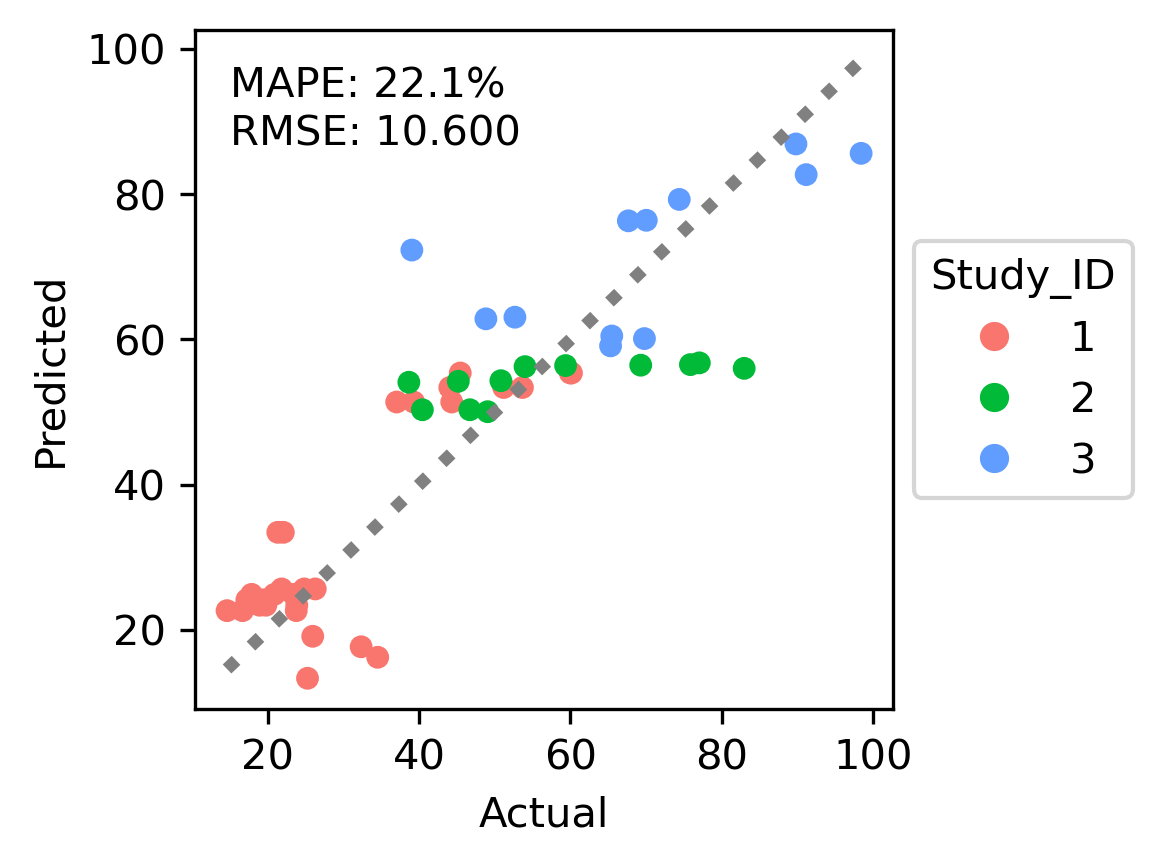

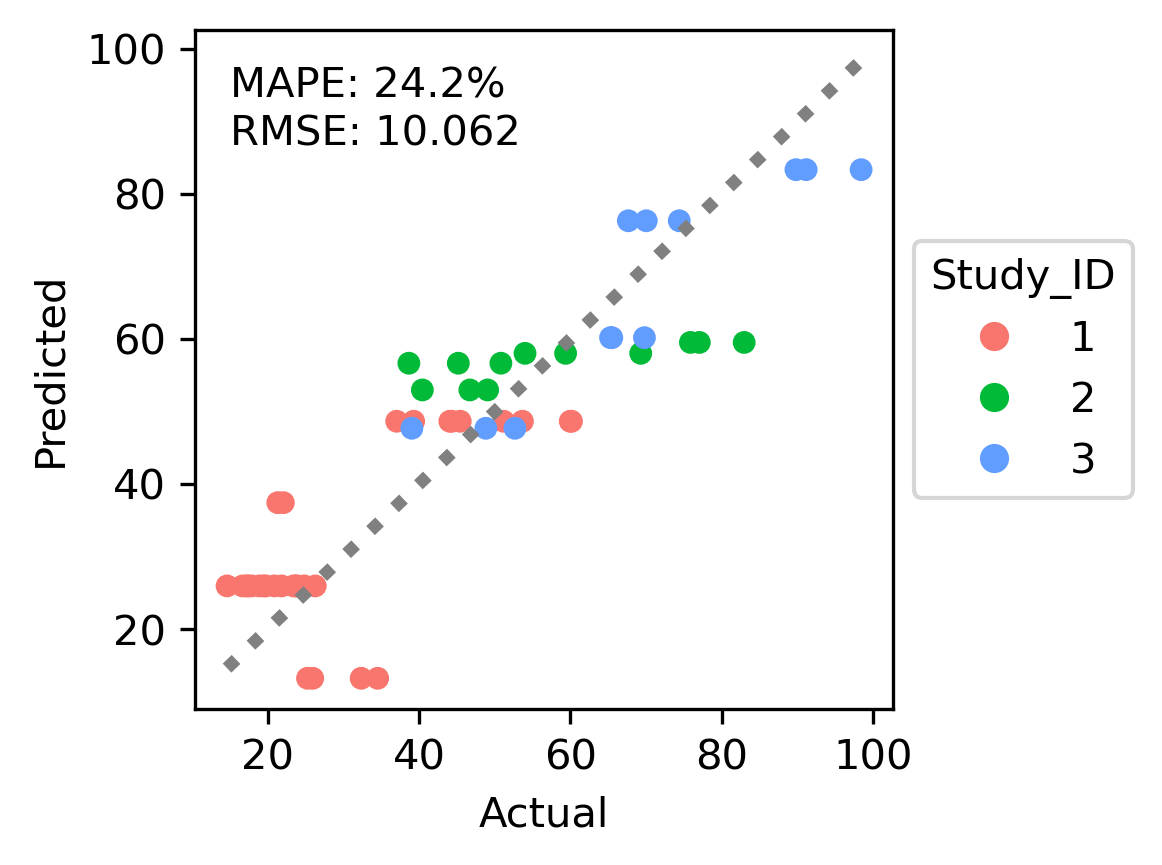

In [6]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeavePGroupsOut

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import itertools
from sklearn.metrics import mean_absolute_percentage_error
import pylab as py
import matplotlib.pyplot as plt
    
from matplotlib.colors import ListedColormap
    
data =pd.read_csv('./../30_12_12.csv',header=0)
features_all=data.iloc[:,1:8]
columns = list(features_all.columns)

for sub_i in range(len(Subsets_Hard)):

    response = 'hardness'
    if response=='crosswise':
        X = np.array(features_all)
       # y = np.array(features_all.iloc[:,6:7])
       # print(features_all.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
       # print(features_all.iloc[:,6:7].head())

    elif response=='lengthwise':
        X = np.array(features_all)
       # y = np.array(features_all.iloc[:,7:8])    
       # print(features_all.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
       # print(features_all.iloc[:,7:8].head())    

    elif response=='chewiness':
        y = np.array(data.iloc[:,9:10])
        print(features_all.head())
        print(data.iloc[:,9:10].head())
    elif response=='hardness':
        y = np.array(data.iloc[:,8:9])
        print(features_all.head())
        print(data.iloc[:,8:9].head())        

    feat=[columns.index(i) for i in Subsets_Hard[sub_i]]
    X = np.array(features_all.iloc[:,feat])


    y_true, predictions, residuals = list(), list(), list()
    loo = LeavePGroupsOut(n_groups=1)
    groups = data.iloc[:,10:11].values.ravel()
    study_id = data.iloc[:,0]

    print(groups)
    k_fold=loo.get_n_splits(X,groups=groups)
    print(k_fold)
    grid = dict()
    grid['sel__k'] = [i for i in range(1, X.shape[1]+1)]




    g_mse, g_mae, g_rmse, g_r2, g_r2adj,g_mape = list(),list(),list(),list(),list(),list()
    count=0
    predictions_, y_trues_, residuals_ = list(), list(), list()
    labels= list()
    for train_index, test_index in loo.split(X,groups=groups):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        count += 1
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        labels.extend(study_id[test_index])

       # scaler = StandardScaler()
       # y_train = scaler.fit_transform(y_train)
       # y_test = scaler.transform(y_test)

        reg = Ridge().fit(X_train, y_train.ravel())
        prediction = reg.predict(X_test)
        predictions_.extend(prediction)
        y_trues_.extend(y_test.ravel())

        residual =  y_test.ravel()-prediction
        residuals_.extend(residual)          


        pred = predictions_
        true = y_trues_

    g_mse.append(mean_squared_error(true, pred))
    g_mae.append(mean_absolute_error(true, pred))
    g_rmse.append(mean_squared_error(true, pred, squared=False))
    g_mape.append(mean_absolute_percentage_error(true, pred))
    g_r2.append(r2_score(true, pred))
    g_r2adj.append(1 - (1-r2_score(true, pred))*(len(true)-1)/(len(true)-len(feat)-1))
    error =np.array(g_mse).mean()
    error2 =np.array(g_mae).mean()
    error3 =np.array(g_rmse).mean()
    error4 = np.array(g_mape).mean()
    r2_score_val =np.array(g_r2).mean()
    r2_adj =np.array(g_r2adj).mean()

    print(feat)
    #Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 
    #A constant model that always predicts the expected value of y, disregarding the input features, would get a  score of 0.0.
    print('Number of features:',  len(feat))
    print('Features:',  features_all.columns[feat])
    #  print('Mean Squared Error (MSE): %.3f' % error) 
    #  print('Mean Absolute Error (MAE): %.3f' % error2) 
    print('Root Mean Squared Error (RMSE): %.3f' % error3) 
    print('Adjusted r2_score: %.3f' %r2_adj)
    print('r2_score: %.3f' % r2_score_val)
    print(f'Mean absolute percentage error (MAPE): {error4:.1f}%')

    error3 = mean_squared_error(true, pred, squared=False)
    error4 =  np.mean(np.abs((np.array(true) - np.array(pred))/true))*100
#mean_absolute_percentage_error(true, pred)
    r2_score_val = r2_score(true, pred)
    adj_R2=(1 - (1-r2_score_val)*(len(true)-1)/(len(true)-((7))-1))    

    fig = plt.figure(figsize=(3,3), dpi=300)
    ax = plt.axes()

   # fig, ax = plt.subplots(figsize=(4,4))
    plt.text(x=0.05,y=0.83,s='RMSE: %.3f' % error3, transform=ax.transAxes)
    plt.text(x=0.05,y=0.90,s=f'MAPE: {error4:.1f}%', transform=ax.transAxes)
    #plt.text(x=0.05,y=0.95,s='Adjusted R2: %.3f' % adj_R2, transform=ax.transAxes)
    #plt.text(x=0.05,y=0.90,s='R2: %.3f' % r2_score_val, transform=ax.transAxes)


    #plt.title('Ridge (Subset'+str(sub_i+1)+')('+response+')')
    #ax.scatter(true, pred,labels)
    colors = ListedColormap(['#F8766D','#00BA38','#619CFF'])

    scatter=plt.scatter(true, pred,c=labels, cmap=colors,s=20)

    true=np.array(true)


    ax.plot([true.min(), true.max()], [true.min(), true.max()], linestyle = 'dotted', lw=3, color='gray')
    ax.legend(*scatter.legend_elements(),title="Study_ID", loc='center left', bbox_to_anchor=(1, 0.5))

    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    #plt.savefig('ridge_hard_pred.pdf', bbox_inches='tight')

    plt.show()





In [10]:
len(residuals_)

54

In [11]:
len(predictions_)

54

In [12]:
residuals_[i]

-2.4217497219609037

In [76]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def sklearn_vif(exogs, data):

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # form input data for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        X, y = data[not_exog], data[exog]
        #print(data[not_exog])
        # extract r-squared from the fit
        r_squared = LinearRegression().fit(X, y).score(X, y)
        print(exog," r_squared: ",r_squared)
        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif

exogs=list(features_all)
exogs=['fat','carbs', 'protein']
sklearn_vif(exogs, features_all)

fat  r_squared:  0.6013514580312934
carbs  r_squared:  0.8141866746032582
protein  r_squared:  0.7015663648512336


,VIF,Tolerance
fat,2.508475,0.398649
carbs,5.381745,0.185813
protein,3.350829,0.298434
